In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/new_AR

/content/drive/MyDrive/new_AR


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 23.5 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/new_AR

/content/drive/MyDrive/new_AR


In [ ]:
import pickle
with open("medical.pkl","rb") as fw:
    medical = pickle.load(fw)
with open("art.pkl","rb") as fw:
    art = pickle.load(fw)
with open("health.pkl","rb") as fw:
    health = pickle.load(fw)
with open("athletic.pickle","rb") as fw:
    athletic =  pickle.load(fw)
with open("pocketball.pickle","rb") as fw:
    pocketball = pickle.load(fw)
with open("camping.pkl","rb") as fw:
    camping = pickle.load(fw)

In [ ]:
medical_iou = []
for i in medical:
  if i<0 or i>1:
    medical_iou.append(0)
  else:
    medical_iou.append(i)

athletic_iou = []
for i in athletic:
  if i<0 or i>1:
    athletic_iou.append(0)
  else:
    athletic_iou.append(i)

art_iou = []
for i in art:
  if i<0 or i>1:
    art_iou.append(0)
  else:
    art_iou.append(i)

health_iou = []
for i in health:
  if i<0 or i>1:
    health_iou.append(0)
  else:
    health_iou.append(i)

pocketball_iou = []
for i in pocketball:
  if i<0 or i>1:
    pocketball_iou.append(0)
  else:
    pocketball_iou.append(i)

camping_iou = []
for i in camping:
  if i<0 or i>1:
    camping_iou.append(0)
  else:
    camping_iou.append(i)

In [ ]:
iou = pocketball_iou + art_iou + health_iou + medical_iou + athletic_iou + camping_iou

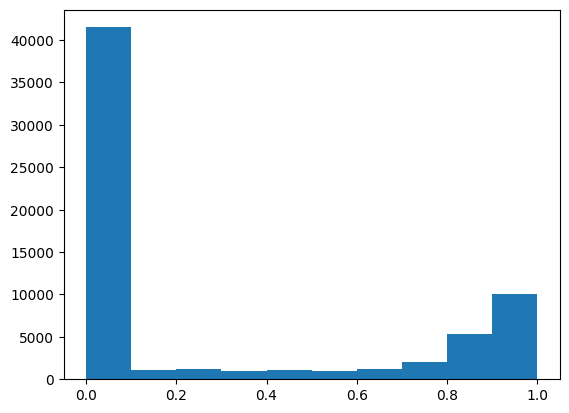

In [ ]:
import matplotlib.pyplot as plt
plt.hist(iou, bins=10)
plt.show()

In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2

pocketball_model = YOLO("pocket_ball/runs/detect/train8/weights/best.pt")
health_model = YOLO("health_yoga/runs/detect/train4/weights/best.pt")
art_model = YOLO("art/runs/detect/train4/weights/best.pt")
medical_model = YOLO("medical/runs/detect/train2/weights/best.pt")
baby_model = YOLO('baby/runs/detect/train/weights/best.pt')
athletic_model = YOLO('athletic/runs/detect/train8/weights/best.pt')
camping_model = YOLO('camping/runs/detect/train5/weights/best.pt') #학습 필요

In [ ]:
a = [[1,2,3],[4,5,6]]
b = []
b = b+a
print(b)

[[1, 2, 3], [4, 5, 6]]


In [ ]:
#이미지 하나 넣을 떄 마다 7가지 모델에 넣고 결과를 확인해야 한다.
#결과를 확인하기 위한 방안
# 1. IOU 임계값 정한 후 이 임계값 위에 해당하는 예측 확인
# 2. 신뢰점수 확인
import pandas as pd
from itertools import zip_longest
import os

def xywh(cate, img):
  path = os.path.join(cate,'datasets/images/val')
  image = os.path.join(path, img)
  results_poketball= pocketball_model.predict(source=image, conf=0.58, iou = 0.5) #신뢰점수 및 IOU 임계값 설정
  results_health= health_model.predict(source=image, conf=0.311, iou = 0.5)
  results_art = art_model.predict(source=image, conf=0.656, iou = 0.5)
  results_medical = medical_model.predict(source=image, conf=0.466, iou = 0.5)
  results_baby = baby_model.predict(source=image, conf=0.506, iou = 0.5)
  results_athletic = athletic_model.predict(source=image, conf=0.6, iou = 0.5)
  results_camping = camping_model.predict(source=image, conf=0.363, iou = 0.5)

  from google.colab import output
  output.clear()

  #df = pd.DataFrame(columns=['xywh','conf','cls'])

  for pocketball, health, art, medical, baby, athletic, camping in zip_longest(results_poketball, results_health, results_art, results_medical, results_baby, results_athletic, results_camping, fillvalue = 0):
      # Detection
      #result.boxes.xyxy   # box with xyxy format, (N, 4)
      # confidence score, (N, 1)
      listofxywh= []
      if pocketball.boxes.conf.numel() == 0 :
        pass
      else:
        pocketball_xywh = pocketball.boxes.xywh.float().tolist()
        listofxywh = listofxywh + pocketball_xywh
      if health.boxes.conf.numel()==0:
        pass
      else:
        health_xywh = health.boxes.xywh.float().tolist()
        listofxywh = listofxywh + health_xywh
      if art.boxes.conf.numel() == 0:
        pass
      else:
        art_xywh = art.boxes.xywh.float().tolist()
        listofxywh = listofxywh + art_xywh
      if medical.boxes.conf.numel() ==0:
        pass
      else:
        medical_xywh = medical.boxes.xywh.float().tolist()
        listofxywh = listofxywh + medical_xywh
      if baby.boxes.conf.numel() ==0:
        pass
      else:
        baby_xywh = baby.boxes.xywh.float().tolist()
        listofxywh = listofxywh + baby_xywh
      if athletic.boxes.conf.numel() ==0:
        pass
      else:
        athletic_xywh = athletic.boxes.xywh.float().tolist()
        listofxywh = listofxywh + athletic_xywh
      if camping.boxes.conf.numel() ==0:
        pass
      else:
        camping_xywh = camping.boxes.xywh.float().tolist()
        listofxywh = listofxywh + camping_xywh


  return listofxywh

def IOU(box1, box2):   #중심좌표 x,y,w,h
  #box 좌표 x1, x2, y1, y2  좌상(x1,y1) 우하(x2,y2)
  box1_cor = [box1[0]-box1[2]/2, box1[0]+box1[2]/2, box1[1]+box1[3]/2 , box1[1]-box1[3]/2]
  box2_cor = [box2[0]-box2[2]/2, box2[0]+box2[2]/2, box2[1]+box2[3]/2 , box2[1]-box2[3]/2]

  #box 넓이
  box1_area = box1[2] * box1[3]
  box2_area = box2[2] * box2[3]

  #교집합의 x, y

  intersection_x_length = min(box1_cor[1],box2_cor[1]) - max(box1_cor[0],box2_cor[0])
  intersection_y_length = min(box1_cor[2],box2_cor[2]) - max(box1_cor[3],box2_cor[3])

  intersection = intersection_x_length * intersection_y_length

  return intersection / (box1_area + box2_area - intersection + 1e-7)


In [ ]:
from tqdm import tqdm
from itertools import combinations
import pickle

In [ ]:
images = os.listdir('health_yoga/datasets/images/val')
iou = []
for image in tqdm(images):
  xy = xywh('health_yoga', image)
  combination = list(combinations(xy,2))
  for com in combination:
    iou.append(IOU(com[0], com[1]))

with open("health.pkl","wb") as fw:
    pickle.dump(iou, fw)

100%|██████████| 1281/1281 [1:29:56<00:00,  4.21s/it]


In [ ]:
IOU([1.8,1.8,2,2],[2,2,3,3])

0.44444443950617285

In [ ]:
results_poketball= pocketball_model.predict(source=image, conf=0.58, iou = 0.5) #신뢰점수 및 IOU 임계값 설정
results_health= health_model.predict(source=image, conf=0.311, iou = 0.5) #신뢰점수 및 IOU 임계값 설정
results_art = art_model.predict(source=image, conf=0.656, iou = 0.5)
results_medical = medical_model.predict(source=image, conf=0.466, iou = 0.5)
results_baby = baby_model.predict(source=image, conf=0.506, iou = 0.5)
results_athletic = athletic_model.predict(source=image, conf=0.6, iou = 0.5)
results_camping = camping_model.predict(source=image, conf=0.5, iou = 0.5)

#df = pd.DataFrame(columns=['xywh','conf','cls'])

for pocketball, health, art, medical, baby, athletic, camping in zip_longest(results_poketball, results_health, results_art, results_medical, results_baby, results_athletic, results_camping, fillvalue = 0):
    # Detection
    #result.boxes.xyxy   # box with xyxy format, (N, 4)
    # confidence score, (N, 1)
    listofconf = []
    if pocketball.boxes.conf.numel() == 0 :
      pocketball_conf = []
      pocketball_cls = []
      pocketball_xywh = []
    else:
      pocketball_conf = pocketball.boxes.conf.float().flatten().tolist()
      pocketball_xywh = pocketball.boxes.xywh.float().tolist()
      pocketball_cls = pocketball.boxes.cls.int().flatten().tolist()
    if health.boxes.conf.numel()==0:
      health_conf = []
      health_cls = []
      health_xywh = []
    else:
      health_conf = health.boxes.conf.float().flatten().tolist()
      health_xywh = health.boxes.xywh.float().tolist()
      health_cls = health.boxes.cls.int().flatten().tolist()
    if art.boxes.conf.numel() == 0:
      art_conf = []
      art_cls = []
      art_xywh = []
    else:
      art_conf = art.boxes.conf.float().flatten().tolist()
      art_xywh = art.boxes.xywh.float().tolist()
      art_cls = art.boxes.cls.int().flatten().tolist()
    if medical.boxes.conf.numel() ==0:
      medical_conf = []
      medical_cls = []
      medical_xywh = []
    else:
      medical_conf = medical.boxes.conf.float().flatten().tolist()
      medical_xywh = medical.boxes.xywh.float().tolist()
      medical_cls = medical.boxes.cls.int().flatten().tolist()
    if baby.boxes.conf.numel() ==0:
      baby_conf = []
      baby_cls = []
      baby_xywh = []
    else:
      baby_conf = baby.boxes.conf.float().flatten().tolist()
      baby_xywh = baby.boxes.xywh.float().tolist()
      baby_cls = baby.boxes.cls.int().flatten().tolist()
    if athletic.boxes.conf.numel() ==0:
      athletic_conf = []
      athletic_cls = []
      athletic_xywh = []
    else:
      athletic_conf = athletic.boxes.conf.float().flatten().tolist()
      athletic_xywh = athletic.boxes.xywh.float().tolist()
      athletic_cls = athletic.boxes.cls.int().flatten().tolist()
    if camping.boxes.conf.numel() ==0:
      camping_conf = []
      camping_cls = []
      camping_xywh = []
    else:
      camping_conf = camping.boxes.conf.float().flatten().tolist()
      camping_xywh = camping.boxes.xywh.float().tolist()
      camping_cls = camping.boxes.cls.int().flatten().tolist()
    pocketball_result = pd.DataFrame({'cls':pocketball_cls,
                             'conf':pocketball_conf,
                             'xywh':pocketball_xywh,
                             'cate':["pocket_ball" for _ in range(len(pocketball_cls))]})
    health_result = pd.DataFrame({'cls':health_cls,
                             'conf':health_conf,
                             'xywh':health_xywh,
                             'cate':["health_yoga" for _ in range(len(health_cls))]})
    art_result = pd.DataFrame({'cls':art_cls,
                             'conf':art_conf,
                             'xywh':art_xywh,
                             'cate':["art" for _ in range(len(art_cls))]})
    baby_result = pd.DataFrame({'cls':baby_cls,
                             'conf':baby_conf,
                             'xywh':baby_xywh,
                             'cate':["baby" for _ in range(len(baby_cls))]})
    athletic_result = pd.DataFrame({'cls':athletic_cls,
                             'conf':athletic_conf,
                             'xywh':athletic_xywh,
                             'cate':["athletic" for _ in range(len(athletic_cls))]})
    medical_result = pd.DataFrame({'cls':medical_cls,
                             'conf':medical_conf,
                             'xywh':medical_xywh,
                             'cate':["medical" for _ in range(len(medical_cls))]})
    df = pd.concat([pocketball_result,health_result,art_result,baby_result,athletic_result,medical_result], axis = 0)

df.sort_values(by='conf', ascending=False)